In [1]:
df = pd.read_csv("noshow.csv")

In [2]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
len(df.Neighbourhood.unique())

81

### 변수 설명
- PatientId: 연속형 변수(중복되는 환자 있음)
- AppointmentID: 연속형 변수
- Gender: 범주형 변수 (F, M)
- ScheduledDay: string변수 -> datetime형식으로 바꿔줌
    예약한 날짜
- AppointmentDay: string변수 -> datetime형식으로 바꿔줌, 시간이 들어있지 않다.
    예약 된 날짜
- Age: 연속형 변수 -> 범주형으로 나누는거 한번 생각해보기
- Neighbourhood: 범주형 변수 (unique: 81)
- Scholarship: 범주형 변수 (0,1) 무엇을 의미하는지 찾아보기
            0    99666
            1    10861
- Hipertension: 범주형 변수 (0,1) 고혈압
            0    88726
            1    21801
- Diabetes: 범주형 변수 (0,1) 당뇨
            0    102584
            1      7943
- Alcoholism: 범주형 변수 (0,1) 알콜중독
            0    107167
            1      3360
- Handicap: 범주형 변수 (0,1,2,3,4) 장애여부
            0    108286
            1      2042
            2       183
            3        13
            4         3
- SMS_received: 범주형 변수 (0,1) 진료예약문자를 받았는지
            0    75045
            1    35482    
- No-show: 범주형 변수 (No, Yes) 약속시간에 왔는지 안왔는지
            No     88208
            Yes    22319
- sum_disease: 범주형 변수 (만들어 줌) 걸린 질병의 수
            0    85312
            1    17582
            2     7377
            3      256

In [4]:
df["sum_disease"] = df.Hipertension + df.Diabetes + df.Alcoholism

In [5]:
df.sum_disease.value_counts()

0    85312
1    17582
2     7377
3      256
Name: sum_disease, dtype: int64

In [6]:
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

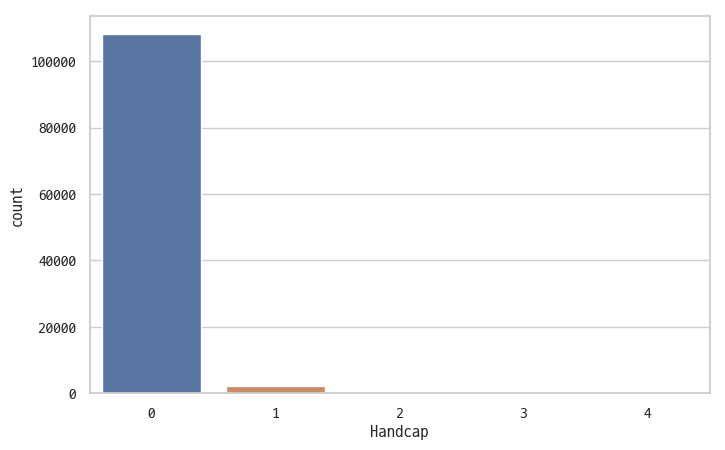

In [7]:
sns.countplot(df.Handcap)

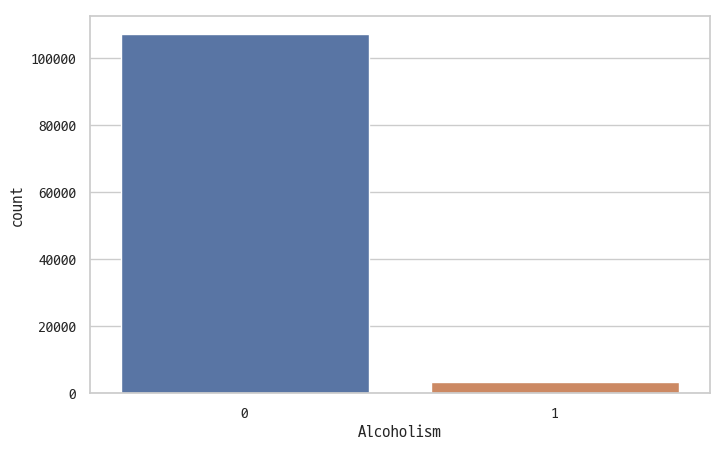

In [8]:
sns.countplot(df.Alcoholism)

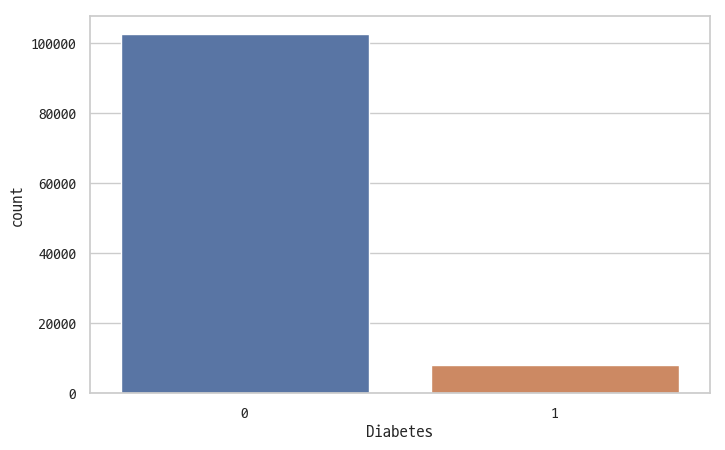

In [9]:
sns.countplot(df.Diabetes)

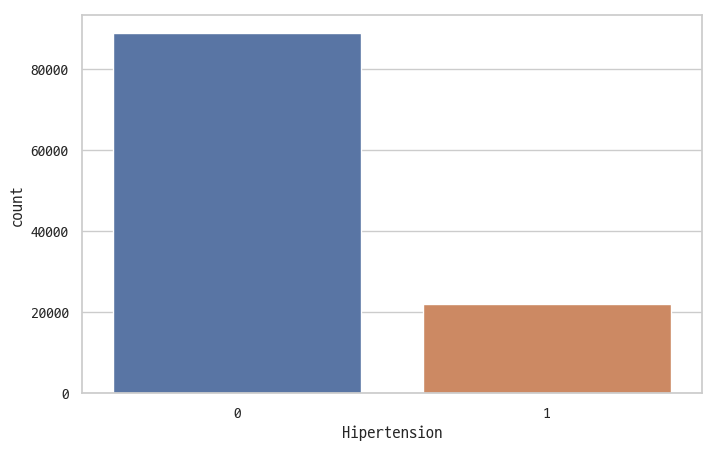

In [10]:
sns.countplot(df.Hipertension)

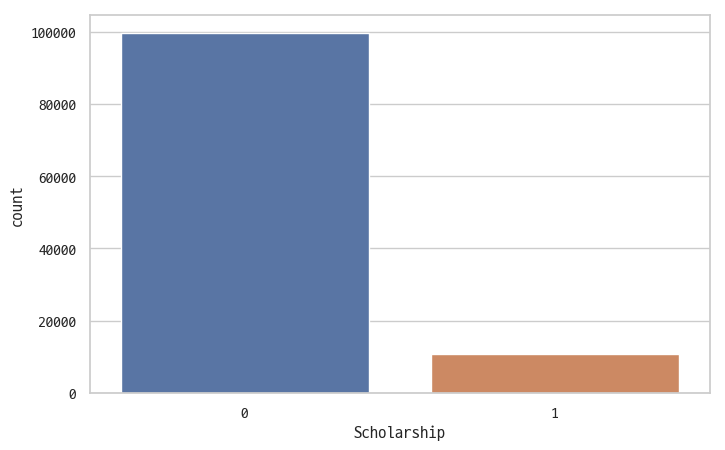

In [11]:
sns.countplot(df.Scholarship)

In [12]:
df.shape

(110527, 15)

In [13]:
a = df[["Gender", "No-show", "AppointmentID"]].groupby(["Gender", "No-show"]).agg('count')

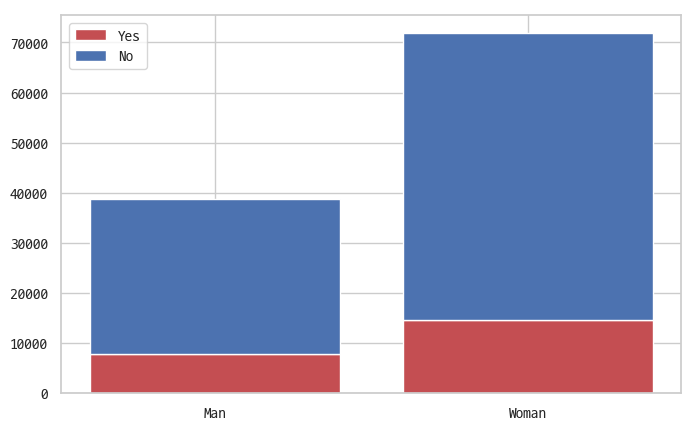

In [14]:
p1 = plt.bar(x=["Man", "Woman"], height=[7725, 14594], color='r')
p2 = plt.bar(x=["Man", "Woman"], height=[30962, 57246], bottom=[7725, 14594], color='b')
plt.legend((p1, p2), ("Yes", "No"))

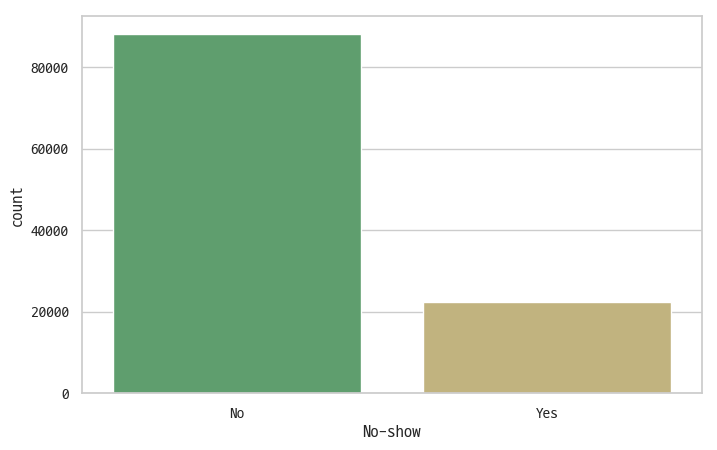

In [15]:
sns.countplot(df["No-show"], palette=['g','y'])

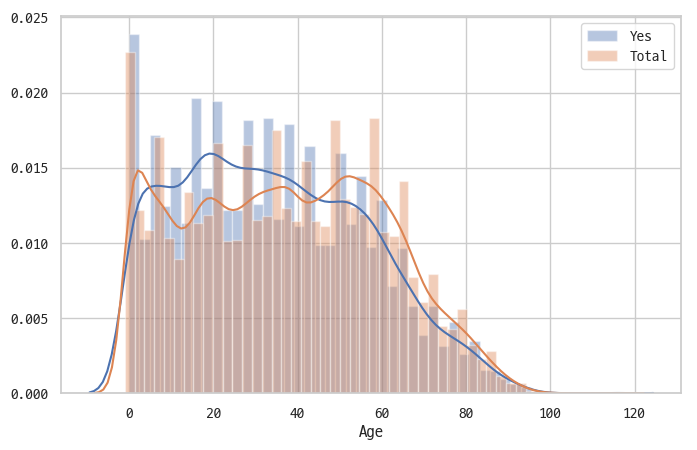

In [16]:
sns.distplot(df["Age"][df["No-show"] == "Yes"])
sns.distplot(df["Age"])
plt.legend(["Yes", "Total"])

In [17]:
len(df["PatientId"].unique())

62299

In [18]:
len(df["AppointmentID"].unique())

110527

In [19]:
df["Scheduled_date"] = df["ScheduledDay"].apply(lambda x: x[:10])

In [20]:
df['Scheduled_date'] = pd.to_datetime(df['Scheduled_date'])

In [21]:
df['Scheduled_time'] = df['ScheduledDay'].apply(lambda x: x[11:-1])

In [22]:
df['Scheduled_time'] = pd.to_timedelta(df['Scheduled_time'])

In [23]:
df['Appointment_date'] = df['AppointmentDay'].apply(lambda x: x[:10])
df['Appointment_date'] = pd.to_datetime(df['Appointment_date'])

In [24]:
df['Appointment_time'] = df['AppointmentDay'].apply(lambda x: x[11:-1])
df['Appointment_time'] = pd.to_timedelta(df['Appointment_time'])

In [28]:
df = df.drop(columns = "Appointment_time")

In [29]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sum_disease,Scheduled_date,Scheduled_time,Appointment_date
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,2016-04-29,18:38:08,2016-04-29
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,2016-04-29,16:08:27,2016-04-29
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,2016-04-29,16:19:04,2016-04-29
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,2016-04-29,17:29:31,2016-04-29
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2,2016-04-29,16:07:23,2016-04-29


In [49]:
df["date_diff"] = df.Appointment_date - df.Scheduled_date

In [53]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sum_disease,Scheduled_date,Scheduled_time,Appointment_date,date_diff
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,2016-04-29,18:38:08,2016-04-29,0 days
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,2016-04-29,16:08:27,2016-04-29,0 days
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,2016-04-29,16:19:04,2016-04-29,0 days
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,2016-04-29,17:29:31,2016-04-29,0 days
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2,2016-04-29,16:07:23,2016-04-29,0 days


In [71]:
df.date_diff = df.date_diff.apply(lambda x: int(str(x).split("days")[0]))

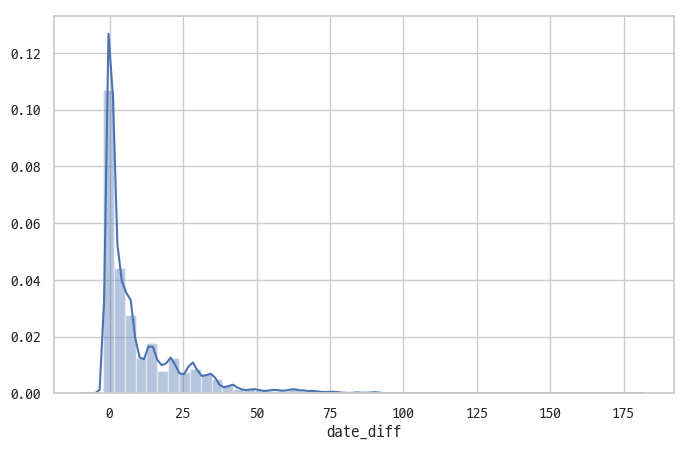

In [72]:
sns.distplot(df.date_diff)

In [83]:
df[df.date_diff < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sum_disease,Scheduled_date,Scheduled_time,Appointment_date,date_diff
27033,7.839273e+12,5679978,M,2016-05-10T10:51:53Z,2016-05-09T00:00:00Z,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,0,2016-05-10,10:51:53,2016-05-09,-1
55226,7.896294e+12,5715660,F,2016-05-18T14:50:41Z,2016-05-17T00:00:00Z,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,0,2016-05-18,14:50:41,2016-05-17,-1
64175,2.425226e+13,5664962,F,2016-05-05T13:43:58Z,2016-05-04T00:00:00Z,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,0,2016-05-05,13:43:58,2016-05-04,-1
71533,9.982316e+14,5686628,F,2016-05-11T13:49:20Z,2016-05-05T00:00:00Z,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,0,2016-05-11,13:49:20,2016-05-05,-6
72362,3.787482e+12,5655637,M,2016-05-04T06:50:57Z,2016-05-03T00:00:00Z,7,TABUAZEIRO,0,0,0,0,0,0,Yes,0,2016-05-04,06:50:57,2016-05-03,-1


## date_diff가 음수인 경우를 어떻게 처리해줄 것인지, No-show는 모두 YES